# Exploring Education Level in the United States

**Author: Tiffany Feng**

## Introduction

**How does education level for males and femals differ by state?**

For my group's research project, we hope to explore if inefficient government spending on children leads to higher rates of hate crimes and/or gun violence for US states. I feel that an insightful dimension to add to this analysis would be education attainment across the population. A large fraction of government spending on children focuses on education.

The educational attainment data I will be using is from [censusreporter.org](https://censusreporter.org/), specifically the [Sex by Educational Attainment for the Population 25 Years and Over](https://censusreporter.org/data/table/?table=B15002&geo_ids=01000US%2C040%7C01000US&primary_geo_id=01000US&fbclid=IwAR0sqPiuVvoN2nadLb3YRD5rdLf-B4HVT5bK-LU3s9EzK_7yVcOmxKnVRZg#) data.




# Preparing Data for Analysis

In order to analyze the data, there is some data preparation that must be done.

## Libraries
Here are the libraries I will be using:

In [1]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

## Importing Data

The educational attainment data I will be using is from [censusreporter.org](https://censusreporter.org/), specifically the [Sex by Educational Attainment for the Population 25 Years and Over](https://censusreporter.org/data/table/?table=B15002&geo_ids=01000US%2C040%7C01000US&primary_geo_id=01000US&fbclid=IwAR0sqPiuVvoN2nadLb3YRD5rdLf-B4HVT5bK-LU3s9EzK_7yVcOmxKnVRZg#) data.

In [2]:
# load a data file
edu = gpd.read_file('data/edu/acs2019_1yr_B15002_04000US46.geojson')

## Preliminary Analysis
What does the data look like?

In [3]:
edu.shape

(52, 73)

In [4]:
edu.head()

,geoid,name,B15002001,"B15002001, Error",B15002002,"B15002002, Error",B15002003,"B15002003, Error",B15002004,"B15002004, Error",...,"B15002031, Error",B15002032,"B15002032, Error",B15002033,"B15002033, Error",B15002034,"B15002034, Error",B15002035,"B15002035, Error",geometry
0,01000US,United States,224898568.0,68852.0,108711092.0,44257.0,1591189.0,26712.0,706919.0,17341.0,...,58737.0,24084820.0,89426.0,11694266.0,62464.0,2167406.0,27426.0,1452745.0,22029.0,"MULTIPOLYGON (((-168.22527 -14.53591, -168.199..."
1,04000US01,Alabama,3360058.0,5792.0,1586206.0,3997.0,18732.0,2672.0,7551.0,1547.0,...,7463.0,292658.0,9612.0,146386.0,6543.0,23337.0,2510.0,17358.0,2596.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
2,04000US02,Alaska,484058.0,2581.0,248666.0,2132.0,1132.0,432.0,1134.0,669.0,...,2066.0,49103.0,2860.0,22290.0,2155.0,6070.0,1454.0,2874.0,884.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
3,04000US04,Arizona,4944540.0,3175.0,2423466.0,2869.0,36159.0,3671.0,16129.0,2606.0,...,7563.0,484997.0,10399.0,219501.0,7143.0,33461.0,2711.0,30110.0,2814.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
4,04000US05,Arkansas,2036456.0,4918.0,975517.0,4168.0,13774.0,1754.0,4855.0,1131.0,...,5484.0,168684.0,6389.0,73731.0,4556.0,10259.0,1499.0,7409.0,1328.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."


In [5]:
# which states are included in the dataset?
edu.name.to_list()

['United States',
 'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

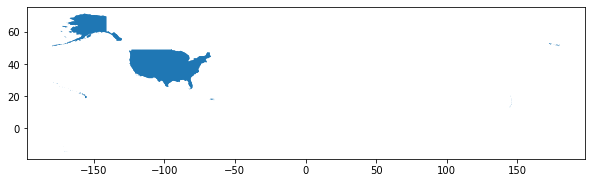

In [6]:
# simple plot:
edu.plot(figsize = (10, 10))

### Data types for each column

In [7]:
# look into data types using .info()
edu.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 73 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             52 non-null     object  
 1   name              52 non-null     object  
 2   B15002001         52 non-null     float64 
 3   B15002001, Error  52 non-null     float64 
 4   B15002002         52 non-null     float64 
 5   B15002002, Error  52 non-null     float64 
 6   B15002003         52 non-null     float64 
 7   B15002003, Error  52 non-null     float64 
 8   B15002004         52 non-null     float64 
 9   B15002004, Error  52 non-null     float64 
 10  B15002005         52 non-null     float64 
 11  B15002005, Error  52 non-null     float64 
 12  B15002006         52 non-null     float64 
 13  B15002006, Error  52 non-null     float64 
 14  B15002007         52 non-null     float64 
 15  B15002007, Error  52 non-null     float64 
 16  B15002008         52

### Deleting the country row
The FIPS code for the first row is different from the rest:

In [8]:
# output the FIPS code:
edu.geoid.head()

0      01000US
1    04000US01
2    04000US02
3    04000US04
4    04000US05
Name: geoid, dtype: object

Notice that the first row looks different from the rest. This is because the first row is for the entire US. I will remove this row as it is data recorded at a different scale than the rest of the data.

In [9]:
# verify that this first row is different:
edu.head()

,geoid,name,B15002001,"B15002001, Error",B15002002,"B15002002, Error",B15002003,"B15002003, Error",B15002004,"B15002004, Error",...,"B15002031, Error",B15002032,"B15002032, Error",B15002033,"B15002033, Error",B15002034,"B15002034, Error",B15002035,"B15002035, Error",geometry
0,01000US,United States,224898568.0,68852.0,108711092.0,44257.0,1591189.0,26712.0,706919.0,17341.0,...,58737.0,24084820.0,89426.0,11694266.0,62464.0,2167406.0,27426.0,1452745.0,22029.0,"MULTIPOLYGON (((-168.22527 -14.53591, -168.199..."
1,04000US01,Alabama,3360058.0,5792.0,1586206.0,3997.0,18732.0,2672.0,7551.0,1547.0,...,7463.0,292658.0,9612.0,146386.0,6543.0,23337.0,2510.0,17358.0,2596.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
2,04000US02,Alaska,484058.0,2581.0,248666.0,2132.0,1132.0,432.0,1134.0,669.0,...,2066.0,49103.0,2860.0,22290.0,2155.0,6070.0,1454.0,2874.0,884.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
3,04000US04,Arizona,4944540.0,3175.0,2423466.0,2869.0,36159.0,3671.0,16129.0,2606.0,...,7563.0,484997.0,10399.0,219501.0,7143.0,33461.0,2711.0,30110.0,2814.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
4,04000US05,Arkansas,2036456.0,4918.0,975517.0,4168.0,13774.0,1754.0,4855.0,1131.0,...,5484.0,168684.0,6389.0,73731.0,4556.0,10259.0,1499.0,7409.0,1328.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."


To drop the first row, we can use this method:

In [10]:
# drop the row with index 0 (first row)
edu1 = edu.drop([0])

In [11]:
# check if the row has been deleted:
edu1.head()

,geoid,name,B15002001,"B15002001, Error",B15002002,"B15002002, Error",B15002003,"B15002003, Error",B15002004,"B15002004, Error",...,"B15002031, Error",B15002032,"B15002032, Error",B15002033,"B15002033, Error",B15002034,"B15002034, Error",B15002035,"B15002035, Error",geometry
1,04000US01,Alabama,3360058.0,5792.0,1586206.0,3997.0,18732.0,2672.0,7551.0,1547.0,...,7463.0,292658.0,9612.0,146386.0,6543.0,23337.0,2510.0,17358.0,2596.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
2,04000US02,Alaska,484058.0,2581.0,248666.0,2132.0,1132.0,432.0,1134.0,669.0,...,2066.0,49103.0,2860.0,22290.0,2155.0,6070.0,1454.0,2874.0,884.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
3,04000US04,Arizona,4944540.0,3175.0,2423466.0,2869.0,36159.0,3671.0,16129.0,2606.0,...,7563.0,484997.0,10399.0,219501.0,7143.0,33461.0,2711.0,30110.0,2814.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
4,04000US05,Arkansas,2036456.0,4918.0,975517.0,4168.0,13774.0,1754.0,4855.0,1131.0,...,5484.0,168684.0,6389.0,73731.0,4556.0,10259.0,1499.0,7409.0,1328.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
5,04000US06,California,26937872.0,5782.0,13208824.0,5833.0,335654.0,10152.0,183192.0,8163.0,...,17645.0,3083392.0,27223.0,1282498.0,18901.0,311613.0,7799.0,191017.0,5479.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."


## Aggregating the data into educational attainment categories

The data set I am using has several columns of educational attainment data for both males and females:
* No schooling completed
* Nursery to 4th grade
* 5th and 6th grade
* 7th and 8th grade
* 9th grade
* 10th grade
* 11th grade
* 12th grade, no diploma
* High school graduate (includes equivalency)
* Some college, less than 1 year
* Some college, 1 or more years, no degree
* Associate's degree
* Bachelor's degree
* Master's degree
* Professional school degree
* Doctorate degree

These columns are under different names in our data set, as it is using a key. The column names are not meaningful. The definitions are found in the metadata file (I will be including it in the data folder.)

In [12]:
# our data's column names:
list(edu1.columns)

['geoid',
 'name',
 'B15002001',
 'B15002001, Error',
 'B15002002',
 'B15002002, Error',
 'B15002003',
 'B15002003, Error',
 'B15002004',
 'B15002004, Error',
 'B15002005',
 'B15002005, Error',
 'B15002006',
 'B15002006, Error',
 'B15002007',
 'B15002007, Error',
 'B15002008',
 'B15002008, Error',
 'B15002009',
 'B15002009, Error',
 'B15002010',
 'B15002010, Error',
 'B15002011',
 'B15002011, Error',
 'B15002012',
 'B15002012, Error',
 'B15002013',
 'B15002013, Error',
 'B15002014',
 'B15002014, Error',
 'B15002015',
 'B15002015, Error',
 'B15002016',
 'B15002016, Error',
 'B15002017',
 'B15002017, Error',
 'B15002018',
 'B15002018, Error',
 'B15002019',
 'B15002019, Error',
 'B15002020',
 'B15002020, Error',
 'B15002021',
 'B15002021, Error',
 'B15002022',
 'B15002022, Error',
 'B15002023',
 'B15002023, Error',
 'B15002024',
 'B15002024, Error',
 'B15002025',
 'B15002025, Error',
 'B15002026',
 'B15002026, Error',
 'B15002027',
 'B15002027, Error',
 'B15002028',
 'B15002028, Error',
 

 I will remove the 'Error' columns as I did not need them in my analysis. This made things less cluttered and easier to analyze.

In [13]:
# lets remove the error columns:
edu1 = edu1[edu1.columns.drop(list(edu1.filter(regex='Error')))]

In [14]:
# check to make sure error columns are removed:
edu1.head()

,geoid,name,B15002001,B15002002,B15002003,B15002004,B15002005,B15002006,B15002007,B15002008,...,B15002027,B15002028,B15002029,B15002030,B15002031,B15002032,B15002033,B15002034,B15002035,geometry
1,04000US01,Alabama,3360058.0,1586206.0,18732.0,7551.0,11561.0,33371.0,31948.0,43666.0,...,33073.0,527060.0,114947.0,265989.0,176959.0,292658.0,146386.0,23337.0,17358.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
2,04000US02,Alaska,484058.0,248666.0,1132.0,1134.0,1460.0,2119.0,1962.0,2967.0,...,1371.0,61055.0,18844.0,39156.0,21397.0,49103.0,22290.0,6070.0,2874.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
3,04000US04,Arizona,4944540.0,2423466.0,36159.0,16129.0,36684.0,36630.0,41507.0,37540.0,...,53255.0,577132.0,206116.0,437908.0,232670.0,484997.0,219501.0,33461.0,30110.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
4,04000US05,Arkansas,2036456.0,975517.0,13774.0,4855.0,10694.0,20518.0,14632.0,20168.0,...,16089.0,347465.0,72751.0,161582.0,95006.0,168684.0,73731.0,10259.0,7409.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
5,04000US06,California,26937872.0,13208824.0,335654.0,183192.0,418841.0,173728.0,245987.0,162621.0,...,319776.0,2700766.0,798392.0,2034645.0,1166825.0,3083392.0,1282498.0,311613.0,191017.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."


Below, I renamed the columns of the totals for male and female so that I could find it easily for my later analysis.

In [15]:
# rename the columns of the totals for male and female
edu1.rename(columns={'B15002002':'male total','B15002019':'female total'}, inplace=True)

### Aggregation categories
In the code chunk below, I aggregated my educational attainment data into three categories for **males and females**:

*  high school graduate or more
* Associate's degree or more
* Bachelor's degree or more

In [16]:
# "Males high school graduate or more"
male_hs_more = edu1.loc[:,'B15002011':'B15002018'].sum(axis=1)
edu1['Males high school graduate or more'] = male_hs_more

# "Males Associate degree or more"
male_asdeg_more = edu1.loc[:,'B15002014':'B15002018'].sum(axis=1)
edu1['Males Associate degree or more'] = male_asdeg_more

# "Males Bachelor degree or more"
male_bac_more = edu1.loc[:,'B15002015':'B15002018'].sum(axis=1)
edu1['Males Bachelor degree or more'] = male_bac_more

# "Females high school graduate or more"
female_hs_more = edu1.loc[:,'B15002028':'B15002035'].sum(axis=1)
edu1['Females high school graduate or more'] = female_hs_more

# "Females Associate degree or more"
female_asdeg_more = edu1.loc[:,'B15002031':'B15002035'].sum(axis=1)
edu1['Females Associate degree or more'] = female_asdeg_more

# "Females Bachelor degree or more"
female_bac_more = edu1.loc[:,'B15002032':'B15002035'].sum(axis=1)
edu1['Females Bachelor degree or more'] = female_bac_more

In [17]:
# check to make sure my calculations were effective:
edu1.head()

,geoid,name,B15002001,male total,B15002003,B15002004,B15002005,B15002006,B15002007,B15002008,...,B15002033,B15002034,B15002035,geometry,Males high school graduate or more,Males Associate degree or more,Males Bachelor degree or more,Females high school graduate or more,Females Associate degree or more,Females Bachelor degree or more
1,04000US01,Alabama,3360058.0,1586206.0,18732.0,7551.0,11561.0,33371.0,31948.0,43666.0,...,146386.0,23337.0,17358.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ...",1362291.0,530573.0,405618.0,1564694.0,656698.0,479739.0
2,04000US02,Alaska,484058.0,248666.0,1132.0,1134.0,1460.0,2119.0,1962.0,2967.0,...,22290.0,6070.0,2874.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630...",232179.0,87817.0,65820.0,220789.0,101734.0,80337.0
3,04000US04,Arizona,4944540.0,2423466.0,36159.0,16129.0,36684.0,36630.0,41507.0,37540.0,...,219501.0,33461.0,30110.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169...",2109647.0,923273.0,724089.0,2221895.0,1000739.0,768069.0
4,04000US05,Arkansas,2036456.0,975517.0,13774.0,4855.0,10694.0,20518.0,14632.0,20168.0,...,73731.0,10259.0,7409.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ...",844576.0,272016.0,215284.0,936887.0,355089.0,260083.0
5,04000US06,California,26937872.0,13208824.0,335654.0,183192.0,418841.0,173728.0,245987.0,162621.0,...,1282498.0,311613.0,191017.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378...",11067211.0,5511931.0,4559964.0,11569148.0,6035345.0,4868520.0


## Cleaning up the dataset
In the preview of the new dataframe, it appears that many of the columns I used to calculate my new aggregated fields are still there. In the next step, I remove the unnecessary columns for easier analysis.

In [18]:
# get rid of the unnecessary columns:
columns_to_keep = ['geoid',
                  'name',
                  'male total',
                  'geometry',
                  'Males high school graduate or more',
                  'Males Associate degree or more',
                  'Males Bachelor degree or more',
                  'female total',
                  'Females high school graduate or more',
                  'Females Associate degree or more',
                  'Females Bachelor degree or more']

# redefine dataframe into only columns to keep:
edu2 = edu1[columns_to_keep]

# check the new slimmed down dataframe
edu2

,geoid,name,male total,geometry,Males high school graduate or more,Males Associate degree or more,Males Bachelor degree or more,female total,Females high school graduate or more,Females Associate degree or more,Females Bachelor degree or more
1,04000US01,Alabama,1586206.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ...",1362291.0,530573.0,405618.0,1773852.0,1564694.0,656698.0,479739.0
2,04000US02,Alaska,248666.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630...",232179.0,87817.0,65820.0,235392.0,220789.0,101734.0,80337.0
3,04000US04,Arizona,2423466.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169...",2109647.0,923273.0,724089.0,2521074.0,2221895.0,1000739.0,768069.0
4,04000US05,Arkansas,975517.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ...",844576.0,272016.0,215284.0,1060939.0,936887.0,355089.0,260083.0
5,04000US06,California,13208824.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378...",11067211.0,5511931.0,4559964.0,13729048.0,11569148.0,6035345.0,4868520.0
6,04000US08,Colorado,1982756.0,"MULTIPOLYGON (((-109.05095 40.22265, -109.0509...",1824895.0,979789.0,828932.0,1992187.0,1847828.0,1050774.0,866670.0
7,04000US09,Connecticut,1195271.0,"MULTIPOLYGON (((-73.51808 41.66672, -73.51807 ...",1075061.0,547418.0,467050.0,1301149.0,1189520.0,637830.0,527498.0
8,04000US10,Delaware,325736.0,"MULTIPOLYGON (((-75.76007 39.29682, -75.76010 ...",290181.0,129823.0,106244.0,361575.0,330608.0,155261.0,121955.0
9,04000US11,District of Columbia,236952.0,"MULTIPOLYGON (((-77.11975 38.93435, -77.11886 ...",215442.0,151843.0,143674.0,268193.0,248535.0,166508.0,157755.0
10,04000US12,Florida,7435836.0,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ...",6514837.0,2917700.0,2267835.0,8048666.0,7175030.0,3374664.0,2485802.0


I have now removed the columns that I no longer needed. I can now continute with my analysis with my slimmed down dataset.

## Normalize the data

For data inquiry, it is important to ask if normalizing the data would be useful. In this case, it would be helpful to normalize the data so that it can be represented as percentages of the population rather than the raw numbers themselves. Since states vary significantly in population, percentages are useful in this case.

In [19]:
# output columns
list(edu2)

['geoid',
 'name',
 'male total',
 'geometry',
 'Males high school graduate or more',
 'Males Associate degree or more',
 'Males Bachelor degree or more',
 'female total',
 'Females high school graduate or more',
 'Females Associate degree or more',
 'Females Bachelor degree or more']

In [20]:
# new columns for percent of total value for the respective sex

# males
edu2['Percent Males high school graduate or more'] = \
edu2['Males high school graduate or more']/edu2['male total']*100

edu2['Percent Males Associate degree or more'] = \
edu2['Males Associate degree or more']/edu2['male total']*100

edu2['Percent Males Bachelor degree or more'] = \
edu2['Males Bachelor degree or more']/edu2['male total']*100


# females
edu2['Percent Females high school graduate or more'] = \
edu2['Females high school graduate or more']/edu2['female total']*100

edu2['Percent Females Associate degree or more'] = \
edu2['Females Associate degree or more']/edu2['female total']*100

edu2['Percent Females Bachelor degree or more'] = \
edu2['Females Bachelor degree or more']/edu2['female total']*100


/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [21]:
# check that the columns are computed correctly:
edu2.head()

,geoid,name,male total,geometry,Males high school graduate or more,Males Associate degree or more,Males Bachelor degree or more,female total,Females high school graduate or more,Females Associate degree or more,Females Bachelor degree or more,Percent Males high school graduate or more,Percent Males Associate degree or more,Percent Males Bachelor degree or more,Percent Females high school graduate or more,Percent Females Associate degree or more,Percent Females Bachelor degree or more
1,04000US01,Alabama,1586206.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ...",1362291.0,530573.0,405618.0,1773852.0,1564694.0,656698.0,479739.0,85.883612,33.449186,25.571584,88.208825,37.021014,27.045041
2,04000US02,Alaska,248666.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630...",232179.0,87817.0,65820.0,235392.0,220789.0,101734.0,80337.0,93.369821,35.315242,26.469240,93.796306,43.218971,34.129027
3,04000US04,Arizona,2423466.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169...",2109647.0,923273.0,724089.0,2521074.0,2221895.0,1000739.0,768069.0,87.050819,38.097213,29.878241,88.132875,39.694947,30.465944
4,04000US05,Arkansas,975517.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ...",844576.0,272016.0,215284.0,1060939.0,936887.0,355089.0,260083.0,86.577271,27.884291,22.068708,88.307339,33.469314,24.514416
5,04000US06,California,13208824.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378...",11067211.0,5511931.0,4559964.0,13729048.0,11569148.0,6035345.0,4868520.0,83.786498,41.729158,34.522104,84.267664,43.960404,35.461454


In the above dataframe, I have computed the percentages for each category and gender.

# Maps and Charts

## Analyzing Distribution of Education Attainment for Males and Females
In the following section, I will be constructing histograms and choropleth maps of the distribution of education attainment for the United States at the state level.

### High school graduates or more - Histograms

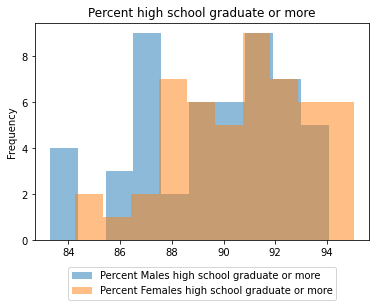

In [22]:
# histograms of the percent of people with educational attainment of high school graduates or more

edu2['Percent Males high school graduate or more'].plot.hist(alpha=0.5)

edu2['Percent Females high school graduate or more'].plot.hist(alpha=0.5)

plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center')

plt.title("Percent high school graduate or more")

plt.show()

It appears that females tend to be slightly more likely to have high school diplomas or equivalent than males.

### High school graduates or more - Choropleth maps

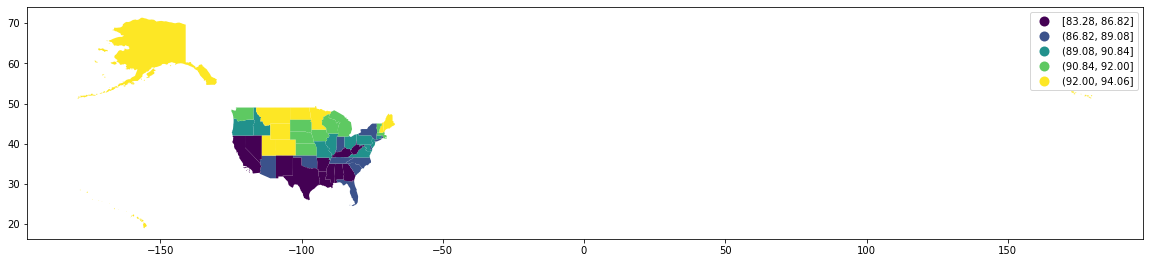

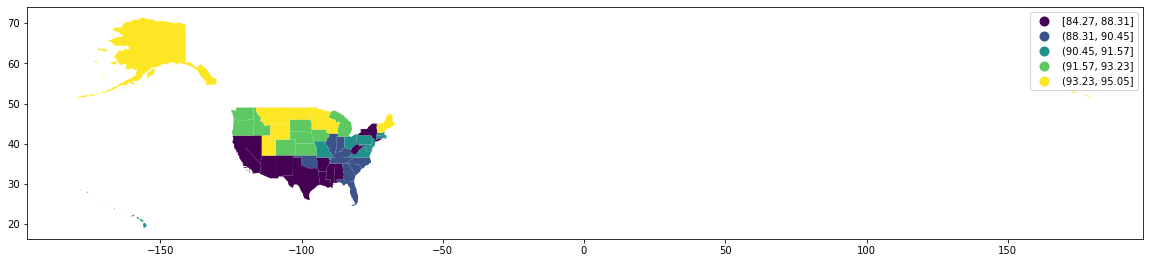

In [23]:
# maps of the percent of people with educational attainment of high school graduates or more

edu2.plot(figsize=(20,20),
                 column='Percent Males high school graduate or more',
                 legend=True, 
                 scheme='quantiles')

edu2.plot(figsize=(20,20),
                 column='Percent Females high school graduate or more',
                 legend=True, 
                 scheme='quantiles')

According to the maps, the Rocky Mountain region of the United States and parts of the Midwest have high rates of high school diploma earners.

### Associate's Degree or More - Histograms

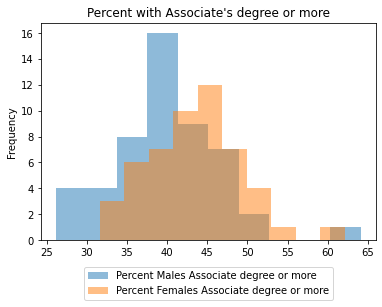

In [24]:
# histograms of the percent of people with educational attainment of Associate degree or more

edu2['Percent Males Associate degree or more'].plot.hist(alpha=0.5)

edu2['Percent Females Associate degree or more'].plot.hist(alpha=0.5)

plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center')

plt.title("Percent with Associate's degree or more")

plt.show()

It appears that females tend to be slightly more likely to have Associate's degrees than males.

### Associate's Degree or More - Choropleth maps

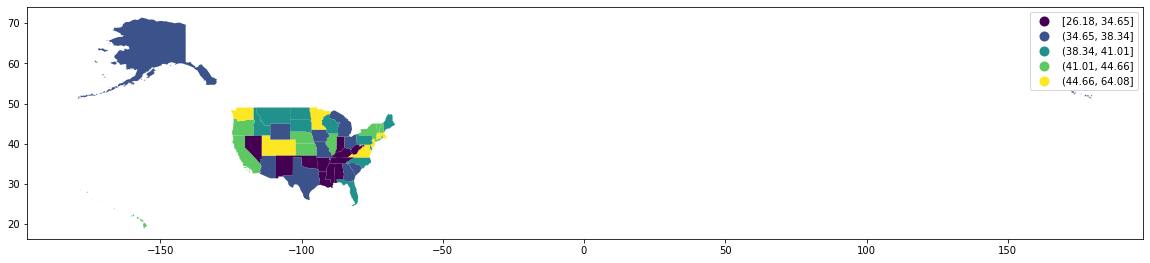

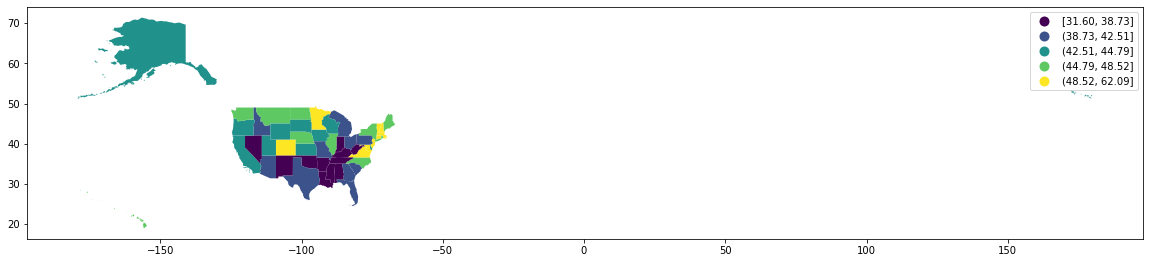

In [25]:
# maps of the percent of people with educational attainment of Associate's degree or more

edu2.plot(figsize=(20,20),
                 column='Percent Males Associate degree or more',
                 legend=True, 
                 scheme='quantiles')

edu2.plot(figsize=(20,20),
                 column='Percent Females Associate degree or more',
                 legend=True, 
                 scheme='quantiles')

According to the maps, the South seems to be the least likely region to have Associate's degrees or higher.

### Bachelor's Degree or More - Histograms

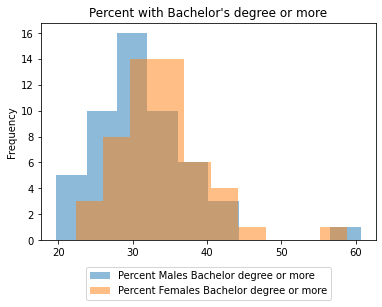

In [26]:
# histograms of the percent of people with educational attainment of Bachelor's degree or more

edu2['Percent Males Bachelor degree or more'].plot.hist(alpha=0.5)

edu2['Percent Females Bachelor degree or more'].plot.hist(alpha=0.5)

plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center')

plt.title("Percent with Bachelor's degree or more")

plt.show()

It appears that females tend to be slightly more likely to have Bachelor's degrees than males.

### Bachelor's Degree or More - Choropleth maps

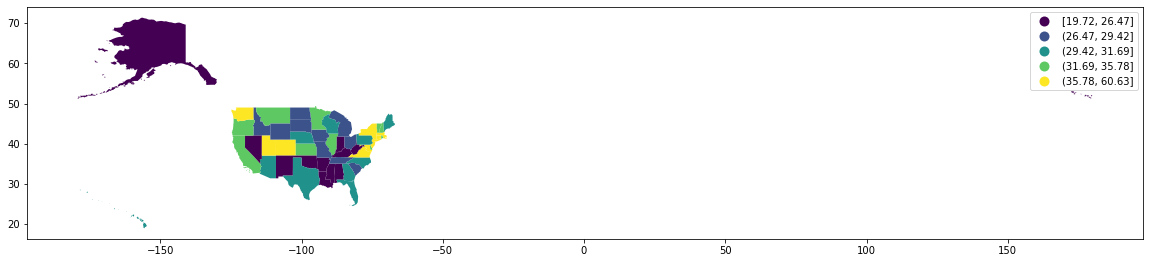

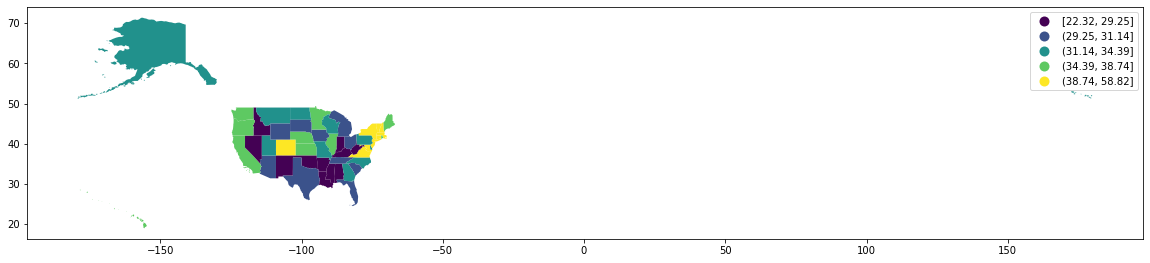

In [27]:
# histograms of the percent of people with educational attainment of Bachelor's degree or more

edu2.plot(figsize=(20,20),
                 column='Percent Males Bachelor degree or more',
                 legend=True, 
                 scheme='quantiles')

edu2.plot(figsize=(20,20),
                 column='Percent Females Bachelor degree or more',
                 legend=True,
                 scheme='quantiles')

According to the maps, the Northeast/Mid-Atlantic region seems to have the highest percentage of Bachelor's degree or higher earners.

### Which states have more than 40% of males and females having a Bachelor's degree or higher?

In [28]:
edu2_male_more_than_40_bac = edu2[edu2['Percent Males Bachelor degree or more']>40]
len(edu2_male_more_than_40_bac)

4

In [29]:
edu2_female_more_than_40_bac = edu2[edu2['Percent Females Bachelor degree or more']>40]
len(edu2_female_more_than_40_bac)

8

There are 4 states in which more than 40% of males have a Bachelor's degree or higher.

There are 8 states in which more than 40% of females have a Bachelor's degree or higher.

Which states fit these categories? They have been mapped out below:

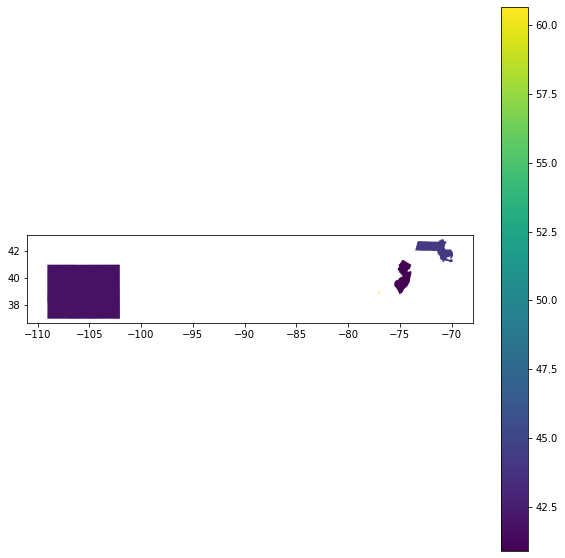

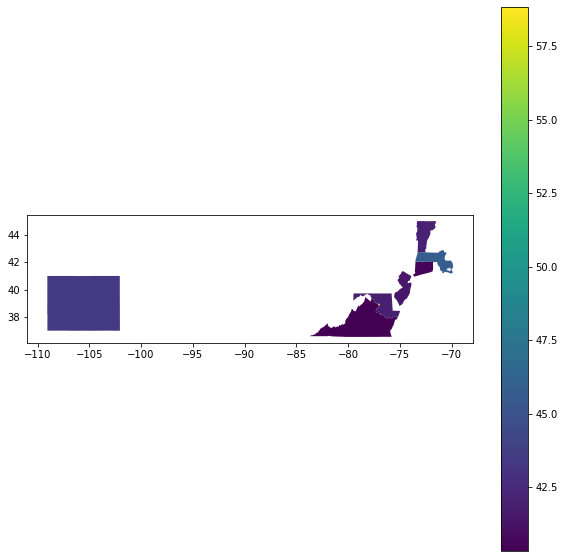

In [30]:
edu2_male_more_than_40_bac.plot(figsize=(10,10),
                                  column='Percent Males Bachelor degree or more',
                                  legend=True)

edu2_female_more_than_40_bac.plot(figsize=(10,10),
                                  column='Percent Females Bachelor degree or more',
                                  legend=True)